В своем проекте я создам модель для прогнозирования цены на квартиру в Москве. В роли обучающих данных я использую dataset с kaggle: https://www.kaggle.com/datasets/ivan314sh/prices-of-moscow-apartments.

Устанавливаю необходимые библиотеки:


In [80]:
!pip install seaborn
!pip install kagglehub
!pip install catboost
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn




[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Games\Важное\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Games\Важное\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Games\Важное\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Games\Важное\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Games\Важное\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Games\Важное\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Games\Важное\python.exe -m pip install --upgrade pip


Импортирую нужные библиотеки:

In [81]:
import kagglehub
import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as mpl
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import os


Загружаю датасет:

In [82]:
way=kagglehub.dataset_download("ivan314sh/prices-of-moscow-apartments")
print("Way to dataset files:", way)

Way to dataset files: C:\Users\1\.cache\kagglehub\datasets\ivan314sh\prices-of-moscow-apartments\versions\3


Смотрю данные:

In [83]:
way="C:\\Users\\1\\.cache\\kagglehub\\datasets\\ivan314sh\\prices-of-moscow-apartments\\versions\\3"
print(os.listdir(way))# Смотрю, какие файлы есть в папке
data=pnd.read_csv("C:\\Users\\1\\.cache\\kagglehub\\datasets\\ivan314sh\\prices-of-moscow-apartments\\versions\\3\\moscow_flats_dataset.csv", index_col=None)
data


['moscow_flats_dataset.csv', 'moscow_flats_dataset_eng.csv']


,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,link
0,31633073.0,24.0,ЮАО,64.2,32.4,11.0,16.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/293204033/
1,29293000.0,9.0,СВАО,78.1,NaN,9.0,27.0,2022.0,1.0,0.0,NaN,2.0,https://www.cian.ru/sale/flat/294033524/
2,30349669.0,5.0,ЮАО,72.4,33.6,3.0,24.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/300712697/
3,31845511.0,19.0,ЮАО,69.2,NaN,2.0,12.0,2024.0,1.0,0.0,2.97,2.0,https://www.cian.ru/sale/flat/300228448/
4,38810000.0,27.0,ЗАО,66.9,24.8,9.0,14.0,2023.0,1.0,0.0,3.00,2.0,https://www.cian.ru/sale/flat/299262105/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,29504877.0,6.0,САО,86.1,49.5,3.0,12.0,NaN,0.0,0.0,NaN,4.0,https://www.cian.ru/sale/flat/298617209/
6979,120000000.0,2.0,ЦАО,163.5,96.0,6.0,6.0,1998.0,0.0,0.0,3.00,4.0,https://www.cian.ru/sale/flat/297548153/
6980,165000000.0,7.0,ЦАО,154.0,76.0,16.0,21.0,2023.0,0.0,0.0,NaN,4.0,https://www.cian.ru/sale/flat/295795425/
6981,21500000.0,11.0,ЮВАО,94.2,69.0,2.0,5.0,NaN,0.0,0.0,2.80,4.0,https://www.cian.ru/sale/flat/300870085/


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983 entries, 0 to 6982
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              6961 non-null   float64
 1   min_to_metro       6846 non-null   float64
 2   region_of_moscow   6892 non-null   object 
 3   total_area         6960 non-null   float64
 4   living_area        4514 non-null   float64
 5   floor              6960 non-null   float64
 6   number_of_floors   6960 non-null   float64
 7   construction_year  5761 non-null   float64
 8   is_new             6949 non-null   float64
 9   is_apartments      6949 non-null   float64
 10  ceiling_height     5053 non-null   float64
 11  number_of_rooms    6983 non-null   float64
 12  link               6983 non-null   object 
dtypes: float64(11), object(2)
memory usage: 709.3+ KB


Проверяю датасет на наличие Nan:

In [55]:
data.isna().sum()


price                  22
min_to_metro          137
region_of_moscow       91
total_area             23
living_area          2469
floor                  23
number_of_floors       23
construction_year    1222
is_new                 34
is_apartments          34
ceiling_height       1930
number_of_rooms         0
link                    0
dtype: int64

Заполню пропуски медианой, так как она устойчива к выбросам:

In [85]:
print(f"Пропусков в price до обработки: {data['price'].isnull().sum()}")
age_median = data['price'].median()
print(f"Медиана price: {age_median:.1f}")
data['price'].fillna(age_median, inplace=True)
print(f"Пропусков в price после обработки: {data['price'].isnull().sum()}")
print()
print(f"Пропусков в min_to_metro до обработки: {data['min_to_metro'].isnull().sum()}")
age_median = data['min_to_metro'].median()
print(f"Медиана min_to_metro: {age_median:.1f}")
data['min_to_metro'].fillna(age_median, inplace=True)
print(f"Пропусков в min_to_metro после обработки: {data['min_to_metro'].isnull().sum()}")
print()
print(f"Пропусков в total_area до обработки: {data['total_area'].isnull().sum()}")
age_median = data['total_area'].median()
print(f"Медиана total_area: {age_median:.1f}")
data['total_area'].fillna(age_median, inplace=True)
print(f"Пропусков в total_area после обработки: {data['total_area'].isnull().sum()}")
print()
print(f"Пропусков в living_area до обработки: {data['living_area'].isnull().sum()}")
age_median = data['living_area'].median()
print(f"Медиана living_area: {age_median:.1f}")
data['living_area'].fillna(age_median, inplace=True)
print(f"Пропусков в living_area после обработки: {data['living_area'].isnull().sum()}")
print()
print(f"Пропусков в floor до обработки: {data['floor'].isnull().sum()}")
age_median = data['floor'].median()
print(f"Медиана floor: {age_median:.1f}")
data['floor'].fillna(age_median, inplace=True)
print(f"Пропусков в floor после обработки: {data['floor'].isnull().sum()}")
print()
print(f"Пропусков в number_of_floors до обработки: {data['number_of_floors'].isnull().sum()}")
age_median = data['number_of_floors'].median()
print(f"Медиана number_of_floors: {age_median:.1f}")
data['number_of_floors'].fillna(age_median, inplace=True)
print(f"Пропусков в number_of_floors после обработки: {data['number_of_floors'].isnull().sum()}")
print()
print(f"Пропусков в construction_year до обработки: {data['construction_year'].isnull().sum()}")
age_median = data['construction_year'].median()
print(f"Медиана mconstruction_year: {age_median:.1f}")
data['construction_year'].fillna(age_median, inplace=True)
print(f"Пропусков в construction_year после обработки: {data['construction_year'].isnull().sum()}")
print()
print(f"Пропусков в is_new до обработки: {data['is_new'].isnull().sum()}")
age_median = data['is_new'].median()
print(f"Медиана is_new: {age_median:.1f}")
data['is_new'].fillna(age_median, inplace=True)
print(f"Пропусков в is_new после обработки: {data['is_new'].isnull().sum()}")
print()
print(f"Пропусков в is_apartments до обработки: {data['is_apartments'].isnull().sum()}")
age_median = data['is_apartments'].median()
print(f"Медиана is_apartments: {age_median:.1f}")
data['is_apartments'].fillna(age_median, inplace=True)
print(f"Пропусков в is_apartments после обработки: {data['is_apartments'].isnull().sum()}")
print()
print(f"Пропусков в ceiling_height до обработки: {data['ceiling_height'].isnull().sum()}")
age_median = data['ceiling_height'].median()
print(f"Медиана ceiling_height: {age_median:.1f}")
data['ceiling_height'].fillna(age_median, inplace=True)
print(f"Пропусков в ceiling_height после обработки: {data['ceiling_height'].isnull().sum()}")




Пропусков в price до обработки: 0
Медиана price: 30500000.0
Пропусков в price после обработки: 0

Пропусков в min_to_metro до обработки: 0
Медиана min_to_metro: 9.0
Пропусков в min_to_metro после обработки: 0

Пропусков в total_area до обработки: 0
Медиана total_area: 70.8
Пропусков в total_area после обработки: 0

Пропусков в living_area до обработки: 0
Медиана living_area: 37.5
Пропусков в living_area после обработки: 0

Пропусков в floor до обработки: 0
Медиана floor: 7.0
Пропусков в floor после обработки: 0

Пропусков в number_of_floors до обработки: 0
Медиана number_of_floors: 16.0
Пропусков в number_of_floors после обработки: 0

Пропусков в construction_year до обработки: 0
Медиана mconstruction_year: 2019.0
Пропусков в construction_year после обработки: 0

Пропусков в is_new до обработки: 0
Медиана is_new: 0.0
Пропусков в is_new после обработки: 0

Пропусков в is_apartments до обработки: 0
Медиана is_apartments: 0.0
Пропусков в is_apartments после обработки: 0

Пропусков в ceili

C:\Users\1\AppData\Local\Temp\ipykernel_23340\2042253824.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price'].fillna(age_median, inplace=True)
C:\Users\1\AppData\Local\Temp\ipykernel_23340\2042253824.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

Так как region_of_moscow является категориальным признаком, я буду использовать немного другой код:

In [86]:
print(f"Пропусков в region_of_moscow до обработки: {data['region_of_moscow'].isnull().sum()}")
embarked_mode=data['region_of_moscow'].mode()[0]
print(f"Медиана region_of_moscow: {embarked_mode}")
data['region_of_moscow'].fillna(embarked_mode, inplace=True)
print(f"Пропусков в region_of_moscow после обработки: {data['region_of_moscow'].isnull().sum()}")


Пропусков в region_of_moscow до обработки: 91
Медиана region_of_moscow: ЦАО
Пропусков в region_of_moscow после обработки: 0


C:\Users\1\AppData\Local\Temp\ipykernel_23340\3976735454.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['region_of_moscow'].fillna(embarked_mode, inplace=True)


Исследую данные:

In [58]:
print(data['region_of_moscow'].value_counts())
print(data['is_new'].value_counts())
print(data['is_apartments'].value_counts())

region_of_moscow
ЦАО     1754
ЗАО     1263
СЗАО     724
ЮАО      698
САО      655
СВАО     543
ЮВАО     502
ЮЗАО     467
ВАО      377
Name: count, dtype: int64
is_new
0.0    5125
1.0    1858
Name: count, dtype: int64
is_apartments
0.0    5895
1.0    1088
Name: count, dtype: int64


Замечу, что "region_of_moscow", "is_new", "is_apartments" являются категориальными признаками; "is_new", "is_apartments" могут принимать только значения "0" или "1", с ними все хорошо. Для переменной "region_of_moscow" применим One-Hot Encoding:

In [59]:

print("Значения region_of_moscow:")
print(data['region_of_moscow'].value_counts())
embarked_encoded=pnd.get_dummies(data['region_of_moscow'], prefix='region_of_moscow')
print(f"\nOne-Hot Encoding создал столбцы: {list(embarked_encoded.columns)}")
print("\nПервые 5 строк:")
print(embarked_encoded.head())
data_r=pnd.concat([data['region_of_moscow'], embarked_encoded], axis=1)

Значения region_of_moscow:
region_of_moscow
ЦАО     1754
ЗАО     1263
СЗАО     724
ЮАО      698
САО      655
СВАО     543
ЮВАО     502
ЮЗАО     467
ВАО      377
Name: count, dtype: int64

One-Hot Encoding создал столбцы: ['region_of_moscow_ВАО', 'region_of_moscow_ЗАО', 'region_of_moscow_САО', 'region_of_moscow_СВАО', 'region_of_moscow_СЗАО', 'region_of_moscow_ЦАО', 'region_of_moscow_ЮАО', 'region_of_moscow_ЮВАО', 'region_of_moscow_ЮЗАО']

Первые 5 строк:
   region_of_moscow_ВАО  region_of_moscow_ЗАО  region_of_moscow_САО  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                  True                 False   

   region_of_moscow_СВАО  region_of_moscow_СЗАО  region_of_moscow_ЦАО  \
0                  False                 

In [60]:
print(data_r.value_counts())

region_of_moscow  region_of_moscow_ВАО  region_of_moscow_ЗАО  region_of_moscow_САО  region_of_moscow_СВАО  region_of_moscow_СЗАО  region_of_moscow_ЦАО  region_of_moscow_ЮАО  region_of_moscow_ЮВАО  region_of_moscow_ЮЗАО
ЦАО               False                 False                 False                 False                  False                  True                  False                 False                  False                    1754
ЗАО               False                 True                  False                 False                  False                  False                 False                 False                  False                    1263
СЗАО              False                 False                 False                 False                  True                   False                 False                 False                  False                     724
ЮАО               False                 False                 False                 False           

Добавляю полученные столбцы в общий датасет:

In [61]:
data=pnd.concat([data, data_r], axis=1)

In [62]:
data

,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,...,region_of_moscow,region_of_moscow_ВАО,region_of_moscow_ЗАО,region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
0,31633073.0,24.0,ЮАО,64.2,32.4,11.0,16.0,2023.0,1.0,0.0,...,ЮАО,False,False,False,False,False,False,True,False,False
1,29293000.0,9.0,СВАО,78.1,37.5,9.0,27.0,2022.0,1.0,0.0,...,СВАО,False,False,False,True,False,False,False,False,False
2,30349669.0,5.0,ЮАО,72.4,33.6,3.0,24.0,2023.0,1.0,0.0,...,ЮАО,False,False,False,False,False,False,True,False,False
3,31845511.0,19.0,ЮАО,69.2,37.5,2.0,12.0,2024.0,1.0,0.0,...,ЮАО,False,False,False,False,False,False,True,False,False
4,38810000.0,27.0,ЗАО,66.9,24.8,9.0,14.0,2023.0,1.0,0.0,...,ЗАО,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,29504877.0,6.0,САО,86.1,49.5,3.0,12.0,2019.0,0.0,0.0,...,САО,False,False,True,False,False,False,False,False,False
6979,120000000.0,2.0,ЦАО,163.5,96.0,6.0,6.0,1998.0,0.0,0.0,...,ЦАО,False,False,False,False,False,True,False,False,False
6980,165000000.0,7.0,ЦАО,154.0,76.0,16.0,21.0,2023.0,0.0,0.0,...,ЦАО,False,False,False,False,False,True,False,False,False
6981,21500000.0,11.0,ЮВАО,94.2,69.0,2.0,5.0,2019.0,0.0,0.0,...,ЮВАО,False,False,False,False,False,False,False,True,False


Удаляю ненужные столбцы:

In [63]:
data=data.drop(['region_of_moscow', 'link'], axis=1)
data_r = data_r.drop('region_of_moscow', axis=1)

In [64]:
data

,price,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,region_of_moscow_ВАО,region_of_moscow_ЗАО,region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
0,31633073.0,24.0,64.2,32.4,11.0,16.0,2023.0,1.0,0.0,3.15,2.0,False,False,False,False,False,False,True,False,False
1,29293000.0,9.0,78.1,37.5,9.0,27.0,2022.0,1.0,0.0,3.00,2.0,False,False,False,True,False,False,False,False,False
2,30349669.0,5.0,72.4,33.6,3.0,24.0,2023.0,1.0,0.0,3.15,2.0,False,False,False,False,False,False,True,False,False
3,31845511.0,19.0,69.2,37.5,2.0,12.0,2024.0,1.0,0.0,2.97,2.0,False,False,False,False,False,False,True,False,False
4,38810000.0,27.0,66.9,24.8,9.0,14.0,2023.0,1.0,0.0,3.00,2.0,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,29504877.0,6.0,86.1,49.5,3.0,12.0,2019.0,0.0,0.0,3.00,4.0,False,False,True,False,False,False,False,False,False
6979,120000000.0,2.0,163.5,96.0,6.0,6.0,1998.0,0.0,0.0,3.00,4.0,False,False,False,False,False,True,False,False,False
6980,165000000.0,7.0,154.0,76.0,16.0,21.0,2023.0,0.0,0.0,3.00,4.0,False,False,False,False,False,True,False,False,False
6981,21500000.0,11.0,94.2,69.0,2.0,5.0,2019.0,0.0,0.0,2.80,4.0,False,False,False,False,False,False,False,True,False


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983 entries, 0 to 6982
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  6983 non-null   float64
 1   min_to_metro           6983 non-null   float64
 2   total_area             6983 non-null   float64
 3   living_area            6983 non-null   float64
 4   floor                  6983 non-null   float64
 5   number_of_floors       6983 non-null   float64
 6   construction_year      6983 non-null   float64
 7   is_new                 6983 non-null   float64
 8   is_apartments          6983 non-null   float64
 9   ceiling_height         6983 non-null   float64
 10  number_of_rooms        6983 non-null   float64
 11  region_of_moscow_ВАО   6983 non-null   bool   
 12  region_of_moscow_ЗАО   6983 non-null   bool   
 13  region_of_moscow_САО   6983 non-null   bool   
 14  region_of_moscow_СВАО  6983 non-null   bool   
 15  regi

Продолжаю исследовать данные, строю тепловую карту корреляций:

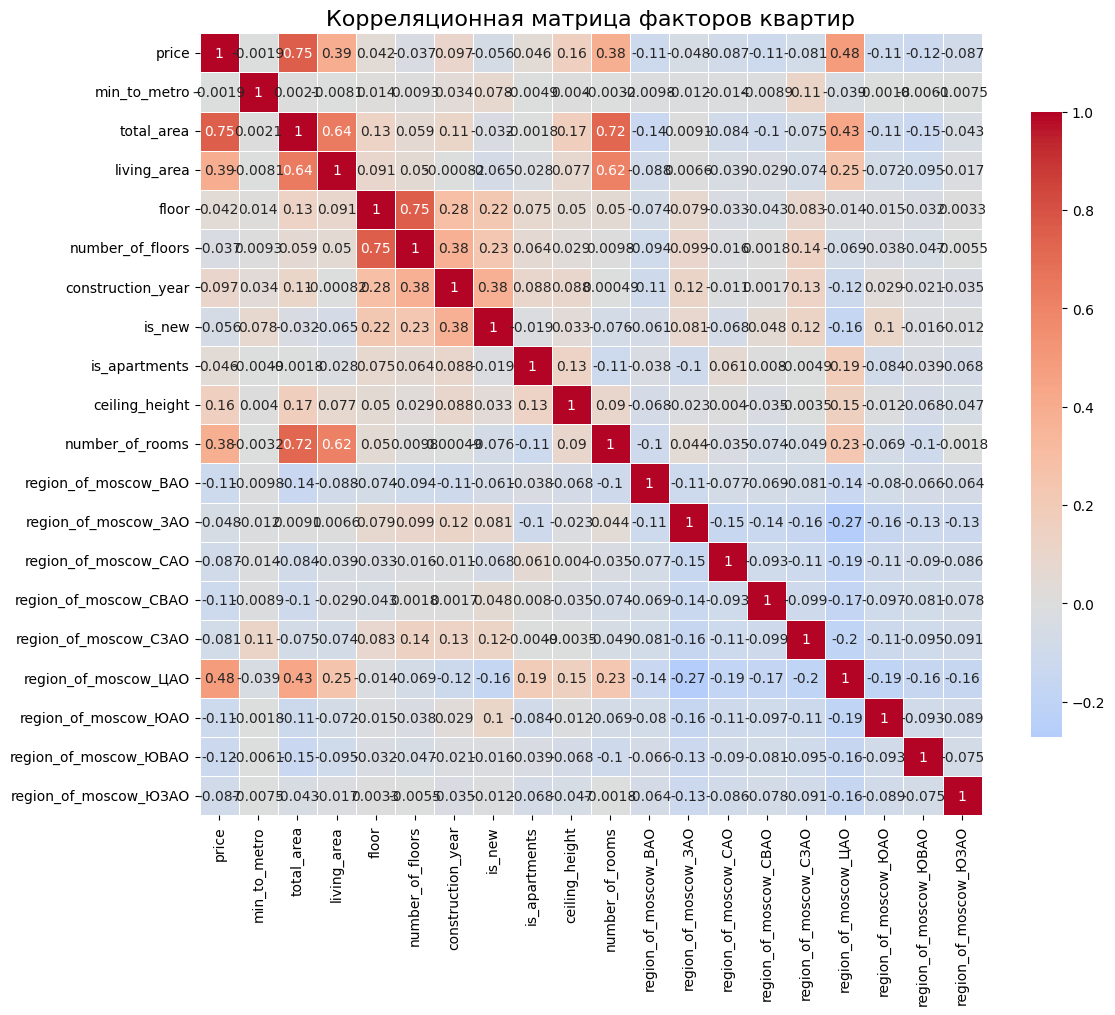

Интерпретация:
• Красный цвет = положительная корреляция (чем больше, тем больше)
• Синий цвет = отрицательная корреляция (чем больше, тем меньше)
• Близко к 0 = слабая связь


In [66]:
mpl.figure(figsize=(12, 10))
# Создаю матрицу корреляций
correlation_matrix = data.corr()
# Тепловая карта корреляций
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
mpl.title('Корреляционная матрица факторов квартир', fontsize=16)
mpl.tight_layout()
mpl.show()
print("Интерпретация:")
print("• Красный цвет = положительная корреляция (чем больше, тем больше)")
print("• Синий цвет = отрицательная корреляция (чем больше, тем меньше)")
print("• Близко к 0 = слабая связь")

Замечу, что total_area имеет высокую положительную корреляцию на price:

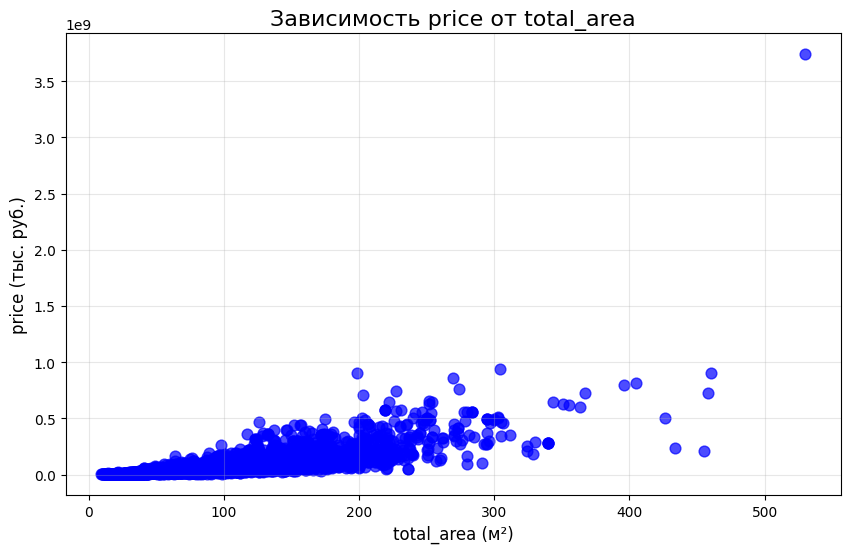

Корреляция между total_area и price: 0.749
(1.0 = идеальная положительная корреляция, 0 = нет связи)


In [67]:
mpl.figure(figsize=(10, 6))
mpl.scatter(data['total_area'], data['price'],
           alpha=0.7, color='blue', s=60)
mpl.title('Зависимость price от total_area', fontsize=16)
mpl.xlabel('total_area (м²)', fontsize=12)
mpl.ylabel('price (тыс. руб.)', fontsize=12)
mpl.grid(True, alpha=0.3)
mpl.show()
correlation = data['total_area'].corr(data['price'])
print(f"Корреляция между total_area и price: {correlation:.3f}")
print("(1.0 = идеальная положительная корреляция, 0 = нет связи)")

Проверяю данные на выбросы, построив для них гистограммы и boxplots:

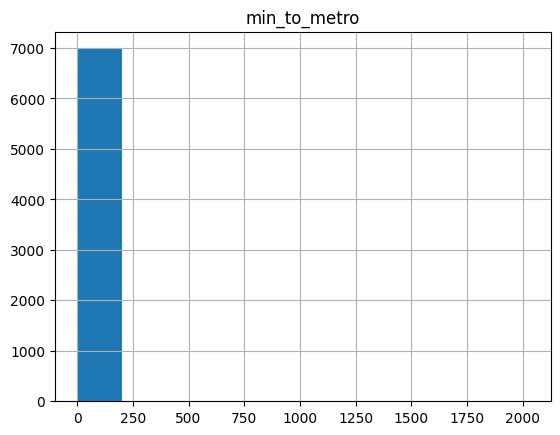

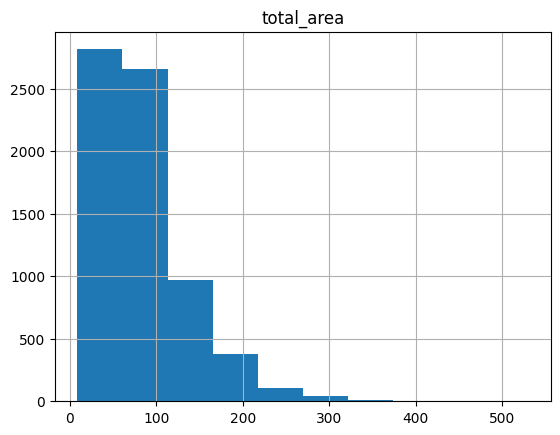

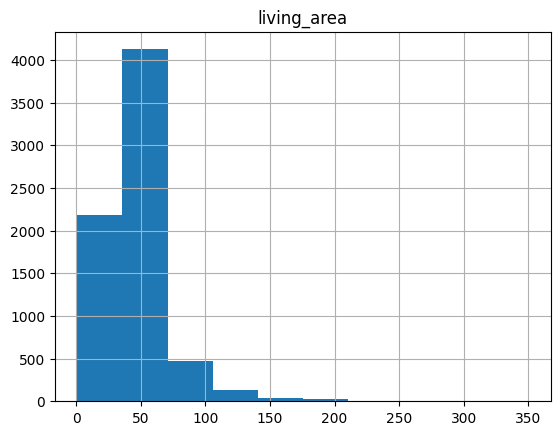

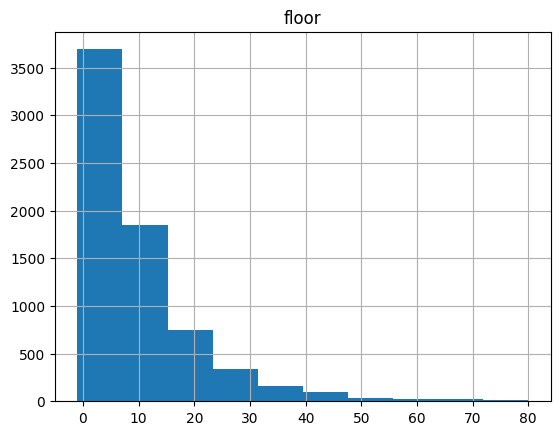

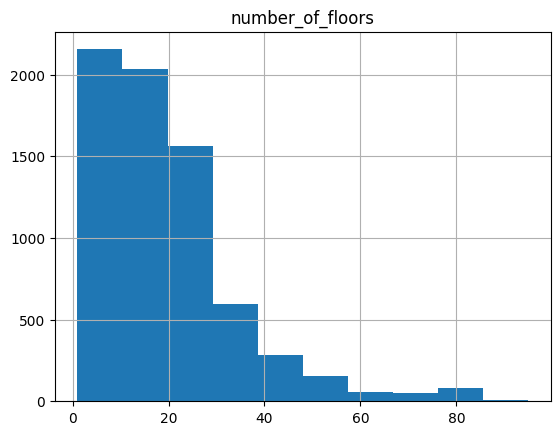

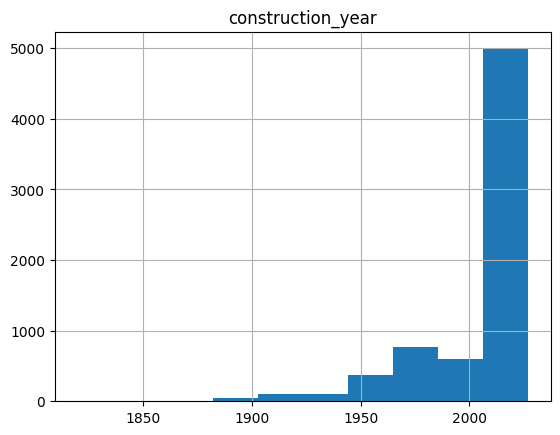

In [68]:
for column in data.columns[1:7]:
    data.hist(column)
    mpl.show()

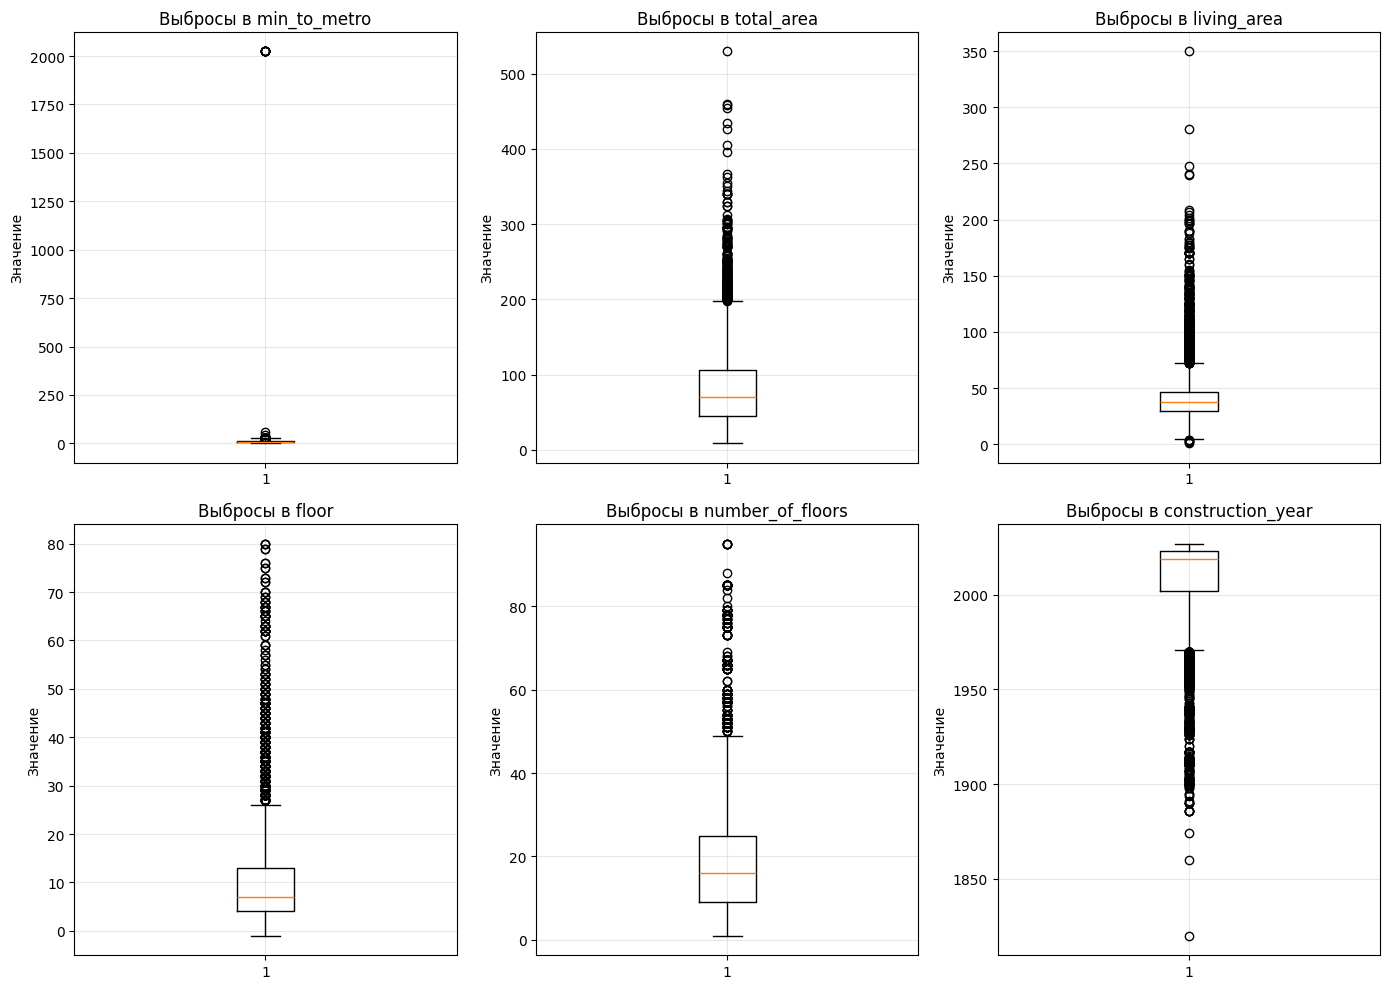

In [69]:
numeric_cols = ['min_to_metro', 'total_area', 'living_area', 'floor', 'number_of_floors', 'construction_year']
fig, axes = mpl.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(data[col].dropna())
    axes[i].set_title(f'Выбросы в {col}')
    axes[i].set_ylabel('Значение')
    axes[i].grid(True, alpha=0.3)
mpl.tight_layout()
mpl.show()

Удаляю выбросы:

In [70]:
'''функция для удаления выбросов'''
def clean_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #тут фильтруем наши данные
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

data = clean_outliers(data, ['min_to_metro', 'total_area', 'living_area', 'floor', 'number_of_floors', 'construction_year'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5360 entries, 0 to 6981
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  5360 non-null   float64
 1   min_to_metro           5360 non-null   float64
 2   total_area             5360 non-null   float64
 3   living_area            5360 non-null   float64
 4   floor                  5360 non-null   float64
 5   number_of_floors       5360 non-null   float64
 6   construction_year      5360 non-null   float64
 7   is_new                 5360 non-null   float64
 8   is_apartments          5360 non-null   float64
 9   ceiling_height         5360 non-null   float64
 10  number_of_rooms        5360 non-null   float64
 11  region_of_moscow_ВАО   5360 non-null   bool   
 12  region_of_moscow_ЗАО   5360 non-null   bool   
 13  region_of_moscow_САО   5360 non-null   bool   
 14  region_of_moscow_СВАО  5360 non-null   bool   
 15  region_of

Снова проверим данные на выбросы:

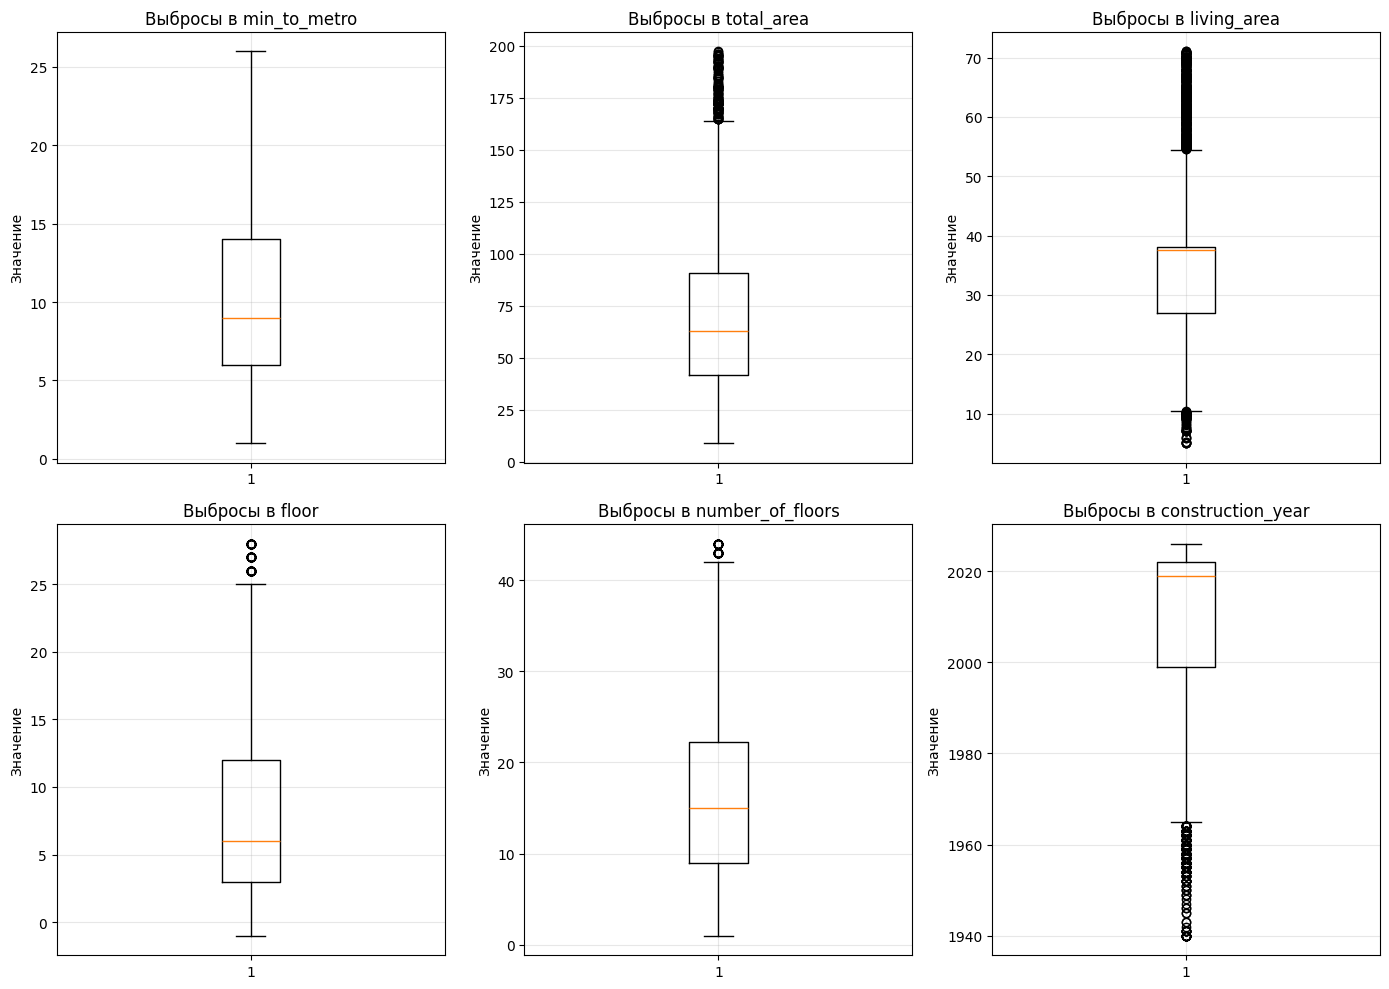

In [71]:
numeric_cols = ['min_to_metro', 'total_area', 'living_area', 'floor', 'number_of_floors', 'construction_year']
fig, axes = mpl.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(data[col].dropna())
    axes[i].set_title(f'Выбросы в {col}')
    axes[i].set_ylabel('Значение')
    axes[i].grid(True, alpha=0.3)
mpl.tight_layout()
mpl.show()

Имею картину гораздо лучше

Настало время создания и обучения моей модели:

In [72]:
from sklearn.preprocessing import StandardScaler
y = data['price']
X = data.drop(columns = ['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train)

      min_to_metro  total_area  living_area  floor  number_of_floors  \
2561          11.0        28.1         37.5    5.0              27.0   
5018           9.0        86.0         37.5   15.0              23.0   
5977          11.0        86.0         37.5    2.0               9.0   
3997           9.0       110.0         52.8    2.0              18.0   
1992          16.0        45.0         26.0    2.0              12.0   
...            ...         ...          ...    ...               ...   
3508           4.0        39.0         18.9    4.0              17.0   
4398           7.0        68.9         46.0    6.0              17.0   
6694          15.0       190.0         37.5    8.0              11.0   
6752          15.0        61.0         42.9    6.0               9.0   
1015           6.0        37.0         22.6    5.0               9.0   

      construction_year  is_new  is_apartments  ceiling_height  \
2561             2022.0     0.0            0.0            3.00   
501

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Замеряю метрики:

In [74]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 861722189422337.5
MAE: 16302989.357588422
R2: 0.7204320758116882


Результаты не самые впечатляющие.

Попробую еще использовать Ridge регрессию с перебором гиперпараметров:

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {
    'alpha': [0.1, 1, 10, 100],  # Варьируем уровень регуляризации
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']  # Выбор оптимизатора
}
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Лучшие параметры: {'alpha': 1, 'solver': 'auto'}


В очередной раз замерим метрики:

In [76]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 861738138896277.4
MAE: 16301678.339914279
R2: 0.7204269013350693


Результат почти не изменился, по этой причине не буду использовать Ridge регрессию.

С регрессией не получается добиться достаточно высоких метрик, попробую создать и обучить случайный лес:

In [77]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 470490547945668.7
MAE: 9202241.127148896
R2: 0.8473590822495044


Небольшим перебором гиперпараметра (n_estimators) нам удалось получить результат сильно лучше, чем в LinearRegression.

Добился хороших метрик, пожалуй остановлюсь на данной модели.

Сохраню модель


In [78]:
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Проверю корректность работы:

In [ ]:
# Данные для предсказания
x_new = [[20, 65, 30, 15, 2025, 5, 1, 0, 3, 2, False, False, False, False, False, True, False, False, False]]

forest_features = [11, 12, 13, 14, 15, 16, 17, 18, 19]  # Индексы категориальных признаков

# Загрузка модели
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Используем загруженную модель для предсказаний
prediction = loaded_model.predict(x_new)
print(prediction)

[59787415.07310539]


c:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
